In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

#library declaration
import pandas as pd #read data
import matplotlib.pyplot as plt #draw chart
import numpy as np #Data processing
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# the layers to build models
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

# checking model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
df = pd.read_csv("E95_price_1.csv",

parse_dates=True)

print(df.shape)
df.tail()

(107, 2)


,year,E95
102,11/11/2022,23860
103,11/21/2022,23780
104,12/1/2022,22700
105,12/12/2022,21200
106,12/21/2022,20700


In [4]:
df["year"]=pd.to_datetime(df.year,format= "%m/%d/%Y")
df

,year,E95
0,2019-01-01,17800
1,2019-01-16,17600
2,2019-01-31,17600
3,2019-02-15,17600
4,2019-03-02,18540
...,...,...
102,2022-11-11,23860
103,2022-11-21,23780
104,2022-12-01,22700
105,2022-12-12,21200


In [5]:
dfl=pd.DataFrame(df,columns=['year','E95'])
dfl.index=dfl.year
dfl.drop("year",axis=1, inplace = True)

In [6]:
dfl

,E95
year,
2019-01-01,17800
2019-01-16,17600
2019-01-31,17600
2019-02-15,17600
2019-03-02,18540
...,...
2022-11-11,23860
2022-11-21,23780
2022-12-01,22700


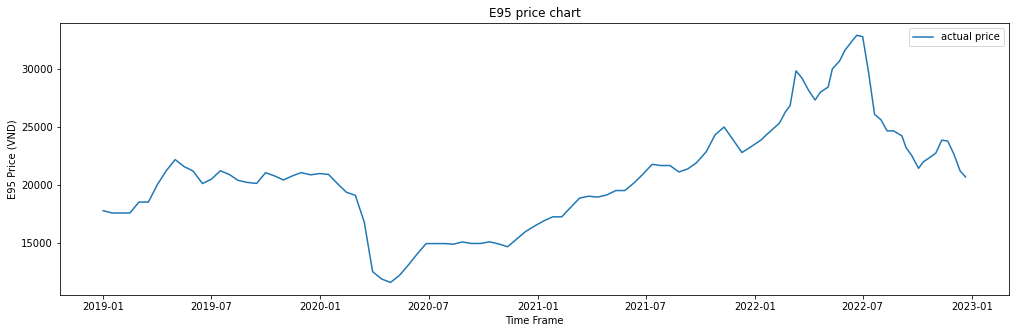

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,5))
plt.plot(dfl['E95'],label='actual price')
plt.title('E95 price chart')
plt.xlabel('Time Frame')
plt.ylabel('E95 Price (VND)')
plt.legend()
plt.show()

In [8]:
data=dfl.values
train_data=data[:95]
test_data=data[95:]

In [9]:
sc=MinMaxScaler(feature_range=(0,1))
sc_train=sc.fit_transform(data)

In [10]:
x_train,y_train=[],[]
for i in range(5,len(train_data)):
  x_train.append(sc_train[i-5:i,0])
  y_train.append(sc_train[i,0])

In [11]:
x_train=np.array(x_train)
y_train=np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))

In [12]:
model=Sequential()
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [13]:
save_model = "save_model.hdf5"
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100, batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.43920, saving model to save_model.hdf5
2/2 - 6s - loss: 0.4392 - 6s/epoch - 3s/step
Epoch 2/100

Epoch 2: loss improved from 0.43920 to 0.37294, saving model to save_model.hdf5
2/2 - 0s - loss: 0.3729 - 63ms/epoch - 31ms/step
Epoch 3/100

Epoch 3: loss improved from 0.37294 to 0.29585, saving model to save_model.hdf5
2/2 - 0s - loss: 0.2959 - 64ms/epoch - 32ms/step
Epoch 4/100

Epoch 4: loss improved from 0.29585 to 0.22468, saving model to save_model.hdf5
2/2 - 0s - loss: 0.2247 - 56ms/epoch - 28ms/step
Epoch 5/100

Epoch 5: loss improved from 0.22468 to 0.13506, saving model to save_model.hdf5
2/2 - 0s - loss: 0.1351 - 59ms/epoch - 30ms/step
Epoch 6/100

Epoch 6: loss improved from 0.13506 to 0.12297, saving model to save_model.hdf5
2/2 - 0s - loss: 0.1230 - 53ms/epoch - 27ms/step
Epoch 7/100

Epoch 7: loss did not improve from 0.12297
2/2 - 0s - loss: 0.1753 - 23ms/epoch - 11ms/step
Epoch 8/100

Epoch 8: loss did not improve from 0.1

2/2 - 0s - loss: 0.0907 - 24ms/epoch - 12ms/step
Epoch 74/100

Epoch 74: loss did not improve from 0.07625
2/2 - 0s - loss: 0.0795 - 25ms/epoch - 12ms/step
Epoch 75/100

Epoch 75: loss did not improve from 0.07625
2/2 - 0s - loss: 0.0840 - 24ms/epoch - 12ms/step
Epoch 76/100

Epoch 76: loss improved from 0.07625 to 0.07428, saving model to save_model.hdf5
2/2 - 0s - loss: 0.0743 - 58ms/epoch - 29ms/step
Epoch 77/100

Epoch 77: loss did not improve from 0.07428
2/2 - 0s - loss: 0.0840 - 20ms/epoch - 10ms/step
Epoch 78/100

Epoch 78: loss did not improve from 0.07428
2/2 - 0s - loss: 0.0770 - 21ms/epoch - 10ms/step
Epoch 79/100

Epoch 79: loss did not improve from 0.07428
2/2 - 0s - loss: 0.0852 - 25ms/epoch - 12ms/step
Epoch 80/100

Epoch 80: loss did not improve from 0.07428
2/2 - 0s - loss: 0.0812 - 22ms/epoch - 11ms/step
Epoch 81/100

Epoch 81: loss did not improve from 0.07428
2/2 - 0s - loss: 0.0823 - 26ms/epoch - 13ms/step
Epoch 82/100

Epoch 82: loss did not improve from 0.07428


In [14]:
y_train=sc.inverse_transform(y_train)
final_model=load_model('save_model.hdf5')
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict)

3/3 [==============================] - 1s 5ms/step


In [15]:
test=dfl[len(train_data)-5:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)

x_test=[]
for i in range(5,test.shape[0]):
  x_test.append(sc_test[i-5:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


y_test=data[95:]
y_test_predict=final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict)

1/1 [==============================] - 0s 29ms/step


C:\Users\Admin\AppData\Local\Temp\ipykernel_11752\1036736061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_datal['prediction']=y_train_predict
C:\Users\Admin\AppData\Local\Temp\ipykernel_11752\1036736061.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_datal['prediction']=y_test_predict


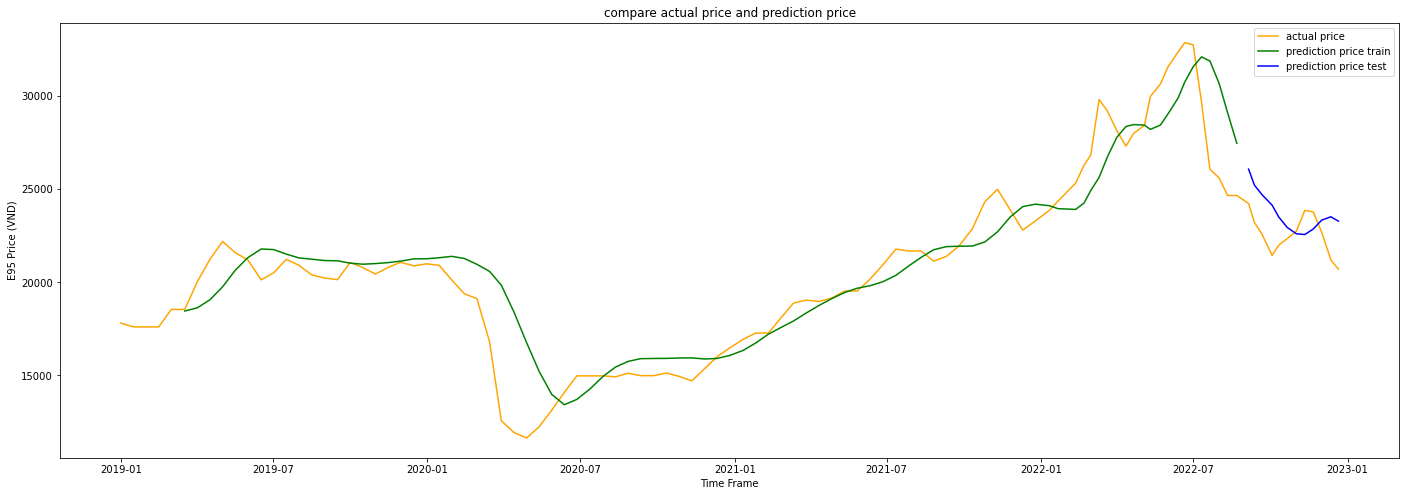

In [16]:
train_datal=dfl[5:95]
test_datal=dfl[95:]

plt.figure(figsize=(24,8))
plt.plot(dfl,label='actual price',color='orange')
train_datal['prediction']=y_train_predict
plt.plot(train_datal['prediction'],label='prediction price train',color='green')
test_datal['prediction']=y_test_predict

plt.plot(test_datal["prediction"], label='prediction price test',color='blue')
plt.title('compare actual price and prediction price')
plt.xlabel('Time Frame')
plt.ylabel('E95 Price (VND)')
plt.legend()
plt.show()

In [17]:
print('Độ phù hợp tập test: ',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình tập test: ', mean_absolute_error(y_test,y_test_predict))
#mape
print('Phần trăm sai số tuyệt đối trung bình tập test: ', mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test:  -1.7583856968691727
Sai số tuyệt đối trung bình tập test:  1557.3932291666667
Phần trăm sai số tuyệt đối trung bình tập test:  0.06998442935841033
